In [1]:
import os
import numpy as np
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from alexnet_FashionMnist import FashionMnist
from ptflops import get_model_complexity_info
from resnet_FashionMnist import resnet_FashionMnist
from vgg_FashionMnist import vgg
from googlenet_FashionMnist import Googlenet

In [2]:
googlenet_fashionmnist = Googlenet()

In [3]:
with torch.cuda.device(0):
    net = googlenet_fashionmnist
    macs, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Sequential(
  5.98 M, 100.000% Params, 1.51 GMac, 99.594% MACs, 
  (0): Sequential(
    3.2 k, 0.054% Params, 41.75 MMac, 2.752% MACs, 
    (0): Conv2d(3.2 k, 0.054% Params, 40.14 MMac, 2.646% MACs, 1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU(0, 0.000% Params, 802.82 KMac, 0.053% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 802.82 KMac, 0.053% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    114.94 k, 1.923% Params, 361.87 MMac, 23.856% MACs, 
    (0): Conv2d(4.16 k, 0.070% Params, 13.05 MMac, 0.860% MACs, 64, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU(0, 0.000% Params, 200.7 KMac, 0.013% MACs, )
    (2): Conv2d(110.78 k, 1.853% Params, 347.42 MMac, 22.903% MACs, 64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(0, 0.000% Params, 602.11 KMac, 0.040% MACs, )
    (4): MaxPool2d(0, 0.000% Params, 602.11 KMac, 0.040% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=

In [4]:
# find the path
path = os.getcwd()
print('This code is in: ', path)

# find the train_data folder
train_data_path = os.path.join(path, 'Googlenet_train_data')
print('The training data are saved in: ', train_data_path)

# find all the folders in the train_data folder
train_data_folders = os.listdir(train_data_path)
print('The folders in the training data folder are: ', train_data_folders)

This code is in:  /home/yj/FinalThesis/GreenAI/GPU/universal
The training data are saved in:  /home/yj/FinalThesis/GreenAI/GPU/universal/Googlenet_train_data
The folders in the training data folder are:  ['round3', 'round7', 'round8', 'round2', 'round5', 'round10', 'round4', 'round1', 'round6', 'round9']


In [5]:
subfolder = []
for round in train_data_folders:
    subfolder.append(os.path.join(train_data_path, round))
print('The subfolders are: ', subfolder)

The subfolders are:  ['/home/yj/FinalThesis/GreenAI/GPU/universal/Googlenet_train_data/round3', '/home/yj/FinalThesis/GreenAI/GPU/universal/Googlenet_train_data/round7', '/home/yj/FinalThesis/GreenAI/GPU/universal/Googlenet_train_data/round8', '/home/yj/FinalThesis/GreenAI/GPU/universal/Googlenet_train_data/round2', '/home/yj/FinalThesis/GreenAI/GPU/universal/Googlenet_train_data/round5', '/home/yj/FinalThesis/GreenAI/GPU/universal/Googlenet_train_data/round10', '/home/yj/FinalThesis/GreenAI/GPU/universal/Googlenet_train_data/round4', '/home/yj/FinalThesis/GreenAI/GPU/universal/Googlenet_train_data/round1', '/home/yj/FinalThesis/GreenAI/GPU/universal/Googlenet_train_data/round6', '/home/yj/FinalThesis/GreenAI/GPU/universal/Googlenet_train_data/round9']


In [6]:
for i in subfolder:
    filesi = os.listdir(i)
    print('The files in the subfolder are: ', filesi)

The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.n

In [7]:
Round = 10
Epoch = 10

In [8]:
Time_AllRound = np.zeros((Round,Epoch,6))
Energy_AllRound = np.zeros((Round,Epoch,1), dtype=object)
TrainTime_AllRound = np.zeros((Round,Epoch,1))
TimeEpoch_AllRound = np.zeros((Round,Epoch,1))
TrainLoss_AllRound = np.zeros((Round,Epoch,1))
TrainAcc_AllRound = np.zeros((Round,Epoch,1))
TestAcc_AllRound = np.zeros((Round,Epoch,1))
TTrainEval_AllRound = np.zeros((Round,Epoch,1))

In [9]:
for round in range(len(subfolder)):
    Time_AllEpochsi = np.load(os.path.join(subfolder[round], 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    Energy_AllEpochsi = np.load(os.path.join(subfolder[round], 'Energy_AllEpochs.npy'), allow_pickle=True)
    TTrainEvali = np.load(os.path.join(subfolder[round], 'TTrainAccLoss.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainTimei = np.load(os.path.join(subfolder[round], 'TrainTime.npy'), allow_pickle=True).reshape(Epoch,1)
    TimeEpochi = np.load(os.path.join(subfolder[round], 'TimeEpoch.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainLossi = np.load(os.path.join(subfolder[round], 'TrainLoss.npy'), allow_pickle=True)
    TrainAcci = np.load(os.path.join(subfolder[round], 'TrainAcc.npy'), allow_pickle=True)
    TestAcci = np.load(os.path.join(subfolder[round], 'TestAcc.npy'), allow_pickle=True).reshape(Epoch,1)
    Time_AllRound[round,:,:] = Time_AllEpochsi
    Energy_AllRound[round,:,:] = Energy_AllEpochsi
    TrainTime_AllRound[round,:,:] = TrainTimei
    TimeEpoch_AllRound[round,:,:] = TimeEpochi
    TrainLoss_AllRound[round,:,:] = TrainLossi
    TrainAcc_AllRound[round,:,:] = TrainAcci
    TestAcc_AllRound[round,:,:] = TestAcci
    TTrainEval_AllRound[round,:,:] = TTrainEvali

#### Time_AllRound

In [10]:
print(Time_AllRound.shape)

(10, 10, 6)


对10个epoch的数据要进行平均

In [11]:
# sum the Time_AllRound according to the epochs
Time_AllRoundSum = np.sum(Time_AllRound, axis=0)
# print(Time_AllRoundSum.shape)
# print(Time_AllRoundSum)
print('*'*50)
# each point divide by the number of rounds
Time_AllRoundAvg = Time_AllRoundSum/Round
print(Time_AllRoundAvg.shape)
print(Time_AllRoundAvg)

**************************************************
(10, 6)
[[ 2.01482444 45.80290468  0.14229698 95.96851249  0.32529032  8.60745461]
 [ 2.01518154 45.85762362  0.13760836 96.16005847  0.32219608  8.61304123]
 [ 2.01408923 45.89613578  0.13882453 96.3149039   0.32382114  8.60439165]
 [ 2.01537106 45.86565468  0.14059634 96.28436391  0.32407069  8.61109695]
 [ 2.01480343 45.9024559   0.13915536 96.36919191  0.32253451  8.61647961]
 [ 2.01706576 45.91784868  0.13813863 96.37738366  0.32347341  8.61795311]
 [ 2.01350994 45.90750599  0.13894465 96.38299205  0.32439089  8.61639843]
 [ 2.0138896  45.91588602  0.14050262 96.40259504  0.32222669  8.62136216]
 [ 2.01454561 45.91488581  0.13871808 96.3790338   0.32137847  8.61725867]
 [ 2.01491835 45.91061876  0.14071774 96.34950655  0.32262237  8.61814313]]


In [12]:
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', Time_AllRoundAvg[:,0].T, '\n',
      'The Forward time of all epoch: \n', Time_AllRoundAvg[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', Time_AllRoundAvg[:,2].T, '\n',
      'The Backward time of all epoch: \n', Time_AllRoundAvg[:,3].T, '\n',
      'The Optimize time of all epoch: \n', Time_AllRoundAvg[:,4].T, '\n',
      'The Test time of all epoch: \n', Time_AllRoundAvg[:,5].T)

For each epoch, the time of each layer is: 
 The Time to Device time of all epoch: 
 [2.01482444 2.01518154 2.01408923 2.01537106 2.01480343 2.01706576
 2.01350994 2.0138896  2.01454561 2.01491835] 
 The Forward time of all epoch: 
 [45.80290468 45.85762362 45.89613578 45.86565468 45.9024559  45.91784868
 45.90750599 45.91588602 45.91488581 45.91061876] 
 The Calculate Loss time of all epoch: 
 [0.14229698 0.13760836 0.13882453 0.14059634 0.13915536 0.13813863
 0.13894465 0.14050262 0.13871808 0.14071774] 
 The Backward time of all epoch: 
 [95.96851249 96.16005847 96.3149039  96.28436391 96.36919191 96.37738366
 96.38299205 96.40259504 96.3790338  96.34950655] 
 The Optimize time of all epoch: 
 [0.32529032 0.32219608 0.32382114 0.32407069 0.32253451 0.32347341
 0.32439089 0.32222669 0.32137847 0.32262237] 
 The Test time of all epoch: 
 [8.60745461 8.61304123 8.60439165 8.61109695 8.61647961 8.61795311
 8.61639843 8.62136216 8.61725867 8.61814313]


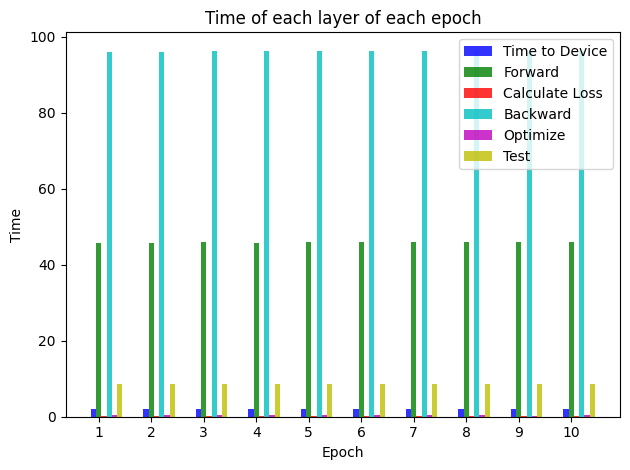

In [13]:
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.1
opacity = 0.8
rects1 = plt.bar(index, Time_AllRoundAvg[:,0].T, bar_width, alpha=opacity, color='b', label='Time to Device')
rects2 = plt.bar(index+bar_width, Time_AllRoundAvg[:,1].T, bar_width, alpha=opacity, color='g', label='Forward')
rects3 = plt.bar(index+2*bar_width, Time_AllRoundAvg[:,2].T, bar_width, alpha=opacity, color='r', label='Calculate Loss')
rects4 = plt.bar(index+3*bar_width, Time_AllRoundAvg[:,3].T, bar_width, alpha=opacity, color='c', label='Backward')
rects5 = plt.bar(index+4*bar_width, Time_AllRoundAvg[:,4].T, bar_width, alpha=opacity, color='m', label='Optimize')
rects6 = plt.bar(index+5*bar_width, Time_AllRoundAvg[:,5].T, bar_width, alpha=opacity, color='y', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Time of each layer of each epoch')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.tight_layout()
plt.show()

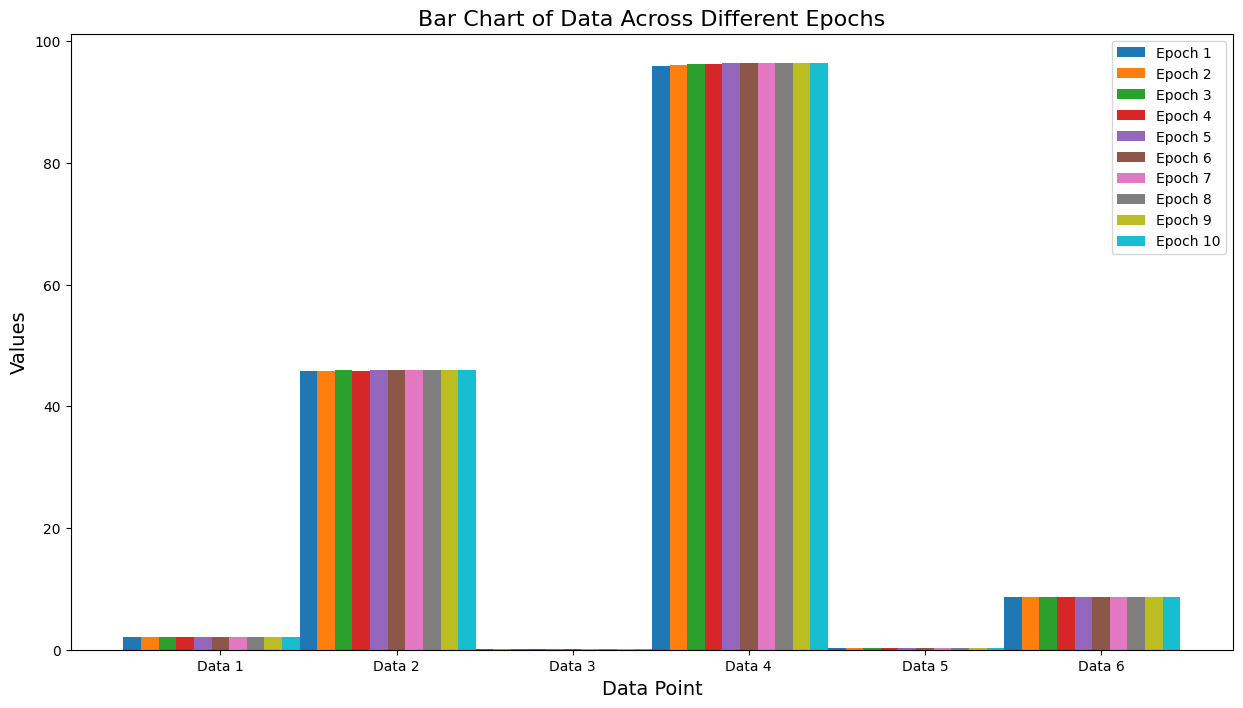

In [14]:
# Number of epochs
epochs = Time_AllRoundAvg.shape[0]
# Setting up the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
# Width of a bar
bar_width = 0.1
# Creating an index for each set of bars
index = np.arange(Time_AllRoundAvg.shape[1])
# Plotting each epoch's data
for i in range(epochs):
    ax.bar(index + i*bar_width, Time_AllRoundAvg[i, :], bar_width, label=f'Epoch {i+1}')
# Adding labels and title
ax.set_xlabel('Data Point', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Bar Chart of Data Across Different Epochs', fontsize=16)
ax.set_xticks(index + bar_width * epochs / 2)
ax.set_xticklabels([f'Data {i+1}' for i in range(Time_AllRoundAvg.shape[1])])
ax.legend()
# Showing the plot
plt.show()

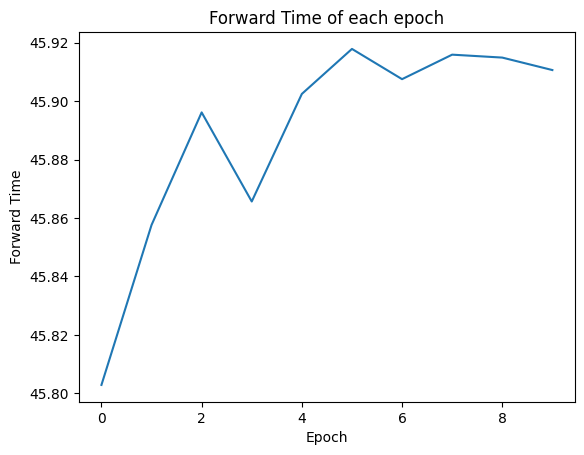

In [15]:
# plot the Forward time of each epoch using matplotlib with line in one figure
plt.plot(Time_AllRoundAvg[:,1].T)
plt.xlabel('Epoch')
plt.ylabel('Forward Time')
plt.title('Forward Time of each epoch')
plt.show()

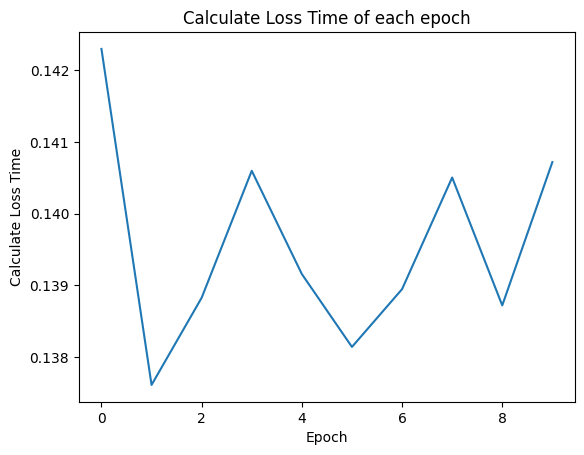

In [16]:
# plot the Calculate Loss of each epoch using matplotlib with line in one figure
plt.plot(Time_AllRoundAvg[:,2].T)
plt.xlabel('Epoch')
plt.ylabel('Calculate Loss Time')
plt.title('Calculate Loss Time of each epoch')
plt.show()

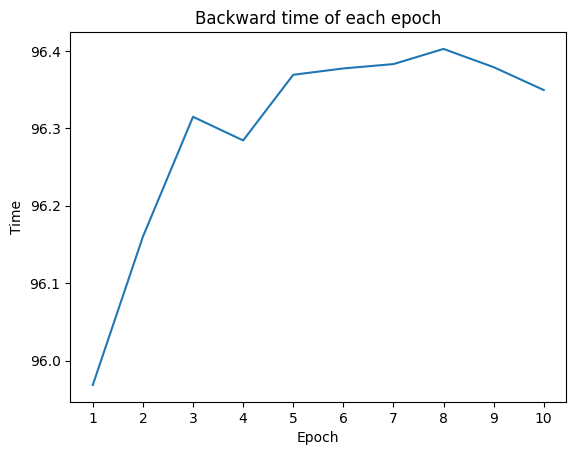

In [17]:
# plot the Backward time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,3].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Backward time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

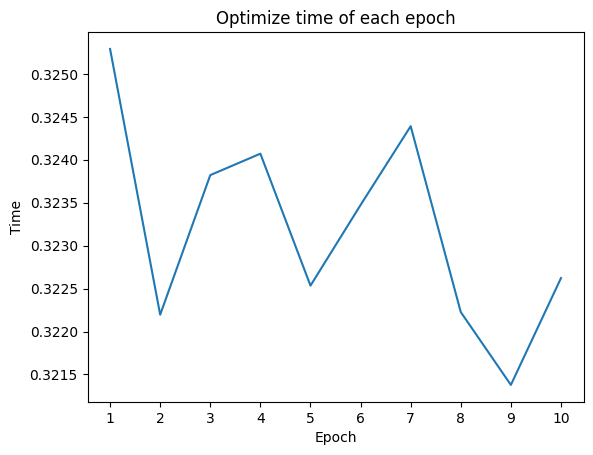

In [18]:
# plot the Optimize time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,4].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Optimize time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

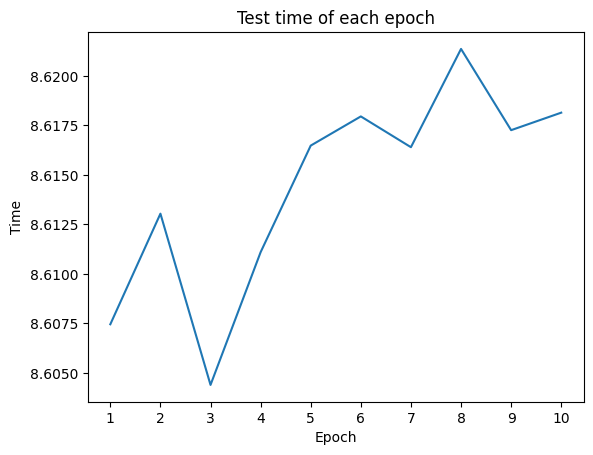

In [19]:
# plot the Test time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,5].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Test time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

#### Energy_AllRound 

In [20]:
print(Energy_AllRound.shape)
# create a ndarray to store the average running time of each epoch
TimeRecorded_Total = np.zeros((Round,Epoch,1))
EnergyRecorded = np.zeros((Round,Epoch,1))
for i in range(len(Energy_AllRound)):
    # print('In round ', i+1, ': \n')
    for j in range(len(Energy_AllRound[i])):
        # print('Epoch ', j+1, 'The total recorded time is: ', len(Energy_AllRound[i][j][0]))
        TimeRecorded_Total[i,j,0] = len(Energy_AllRound[i][j][0])
        EnergyRecorded[i,j,0] = np.sum(Energy_AllRound[i][j][0])

(10, 10, 1)


In [21]:
print(TimeRecorded_Total.shape)
# print(TimeRecorded_Total)
TimeRecorded_Avg = np.sum(TimeRecorded_Total, axis=0)/Round
print(TimeRecorded_Avg.shape)
print(TimeRecorded_Avg.T)

print(EnergyRecorded.shape)
# print(EnergyRecorded)
EnergyRecorded_Avg = np.sum(EnergyRecorded, axis=0)/Round
print(EnergyRecorded_Avg.shape)
print(EnergyRecorded_Avg.T)

(10, 10, 1)
(10, 1)
[[156.4 156.5 156.7 156.8 156.8 156.8 156.9 157.  156.9 157. ]]
(10, 10, 1)
(10, 1)
[[12444.521 12463.47  12480.89  12487.098 12486.77  12486.761 12494.042
  12504.291 12495.592 12502.142]]


In [22]:
# calculate the total energy of each round
Energy_Total = np.sum(EnergyRecorded_Avg, axis=0)
print('The average total energy consumption of each round running is: ', Energy_Total, 'J')

# calculate the total time of each round
Time_Total = np.sum(TimeRecorded_Avg, axis=0)
print('The average total time of each round running is: ', Time_Total, 's')

The average total energy consumption of each round running is:  [124845.577] J
The average total time of each round running is:  [1567.8] s


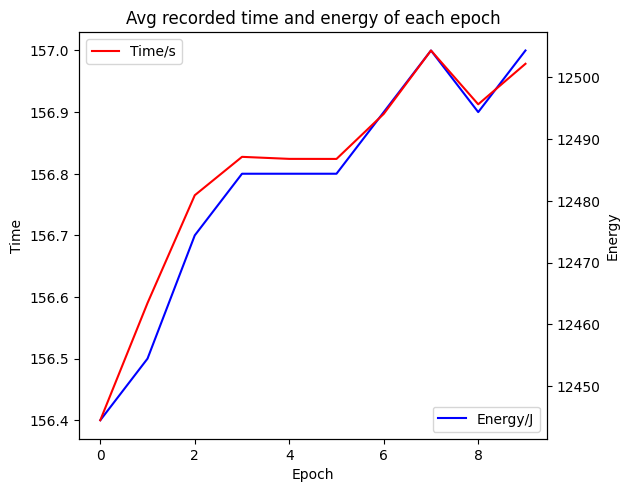

In [23]:
# plot the avg recorded time of each epoch and energy using matplotlib with line in one figure, the left axis is the time and the right axis is the energy
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Time')
ax1.plot(TimeRecorded_Avg, color='b')
plt.legend(['Energy/J'], loc='lower right')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
ax2.plot(EnergyRecorded_Avg, color='r')
ax2.tick_params(axis='y')
fig.tight_layout()
plt.title('Avg recorded time and energy of each epoch')
plt.legend(['Time/s'], loc='upper left')
plt.show()

#### TimeEpoch_AllRound

In [24]:
print(TimeEpoch_AllRound.shape)
# print(TimeEpoch_AllRound)

TimeEpoch_Round = np.zeros((Round,Epoch,1))
for i in range(TimeEpoch_AllRound.shape[0]):
    TimeEpoch_Roundi = TimeEpoch_AllRound[i,:,:]
    # print(TimeEpoch_Roundi.shape)
    time_temp = np.zeros((TimeEpoch_Roundi.shape[0],1))
    for j in range(TimeEpoch_Roundi.shape[0]):
        if j == 0:
            time_temp[j,0] = TimeEpoch_Roundi[j,0]
        else:
            time_temp[j,0] = TimeEpoch_Roundi[j,0] - TimeEpoch_Roundi[j-1,0]
    TimeEpoch_Round[i,:,:] = time_temp
    
print(TimeEpoch_Round.shape)
# print(TimeEpoch_Round)
TimeEpoch_RoundAvg = np.sum(TimeEpoch_Round, axis=0)/Round
print(TimeEpoch_RoundAvg.shape)
print('The average time of each epoch is: \n', TimeEpoch_RoundAvg.T)

(10, 10, 1)
(10, 10, 1)
(10, 1)
The average time of each epoch is: 
 [[155.81972754 156.05904875 156.25684929 156.19630365 156.33274462
  156.36122777 156.35588498 156.38449452 156.34973068 156.33185844]]


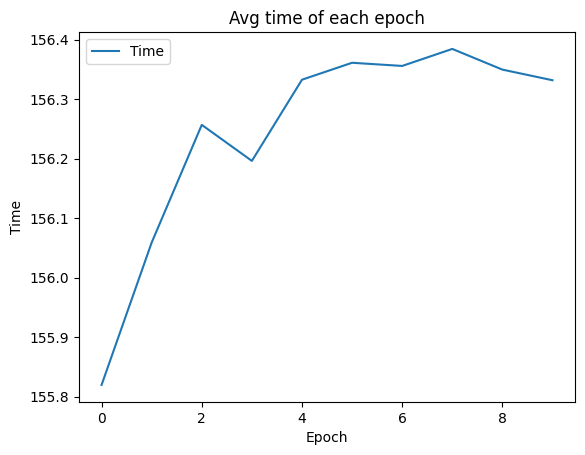

In [25]:
# plot the avg time of each epoch using matplotlib with line in one figure
plt.plot(TimeEpoch_RoundAvg)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Avg time of each epoch')
plt.legend(['Time'], loc='upper left')
plt.show()

#### train loss, acc and test acc

In [26]:
print(TrainLoss_AllRound.shape)
print(TrainAcc_AllRound.shape)
print(TestAcc_AllRound.shape)

(10, 10, 1)
(10, 10, 1)
(10, 10, 1)


In [27]:
# get the average train loss of each epoch
TrainLoss_RoundAvg = np.sum(TrainLoss_AllRound, axis=0)/Round
print(TrainLoss_RoundAvg.shape)
print('The avg train loss of each epoch is: \n', TrainLoss_RoundAvg.T)

# get the average train accuracy of each epoch
TrainAcc_RoundAvg = np.sum(TrainAcc_AllRound, axis=0)/Round
print(TrainAcc_RoundAvg.shape)
print('The avg train acc of each epoch is: \n', TrainAcc_RoundAvg.T)

# get the average test accuracy of each epoch
TestAcc_RoundAvg = np.sum(TestAcc_AllRound, axis=0)/Round
print(TestAcc_RoundAvg.shape)
print('The avg test acc of each epoch is: \n',TestAcc_RoundAvg.T)

(10, 1)
The avg train loss of each epoch is: 
 [[2.30255392 2.25613494 1.79975753 1.26310187 0.9920989  0.80670019
  0.65819604 0.57880643 0.55976568 0.48503969]]
(10, 1)
The avg train acc of each epoch is: 
 [[0.11142    0.20695167 0.36100167 0.52657333 0.62431333 0.692745
  0.74806167 0.78008167 0.79138    0.81732167]]
(10, 1)
The avg test acc of each epoch is: 
 [[0.13996 0.25575 0.39999 0.55157 0.64276 0.72122 0.76046 0.78484 0.78764
  0.81879]]


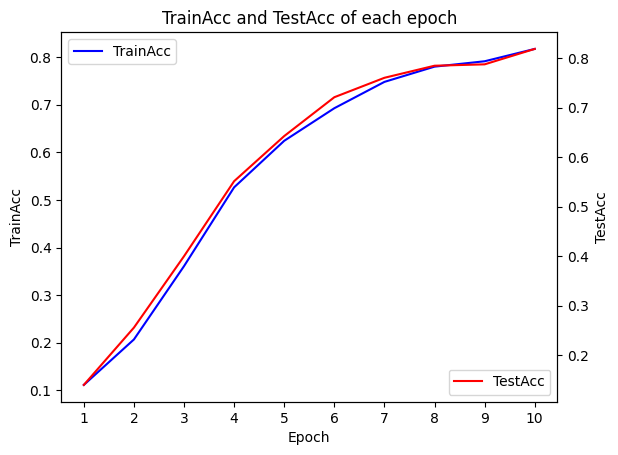

In [28]:
# plot the TrainAcc and TestAcc of each epoch using matplotlib with line in one figure, the left y-axis is for TrainAcc and the right y-axis is for TestAcc
# add the legend for TrainAcc and TestAcc, put it to the bottom right
fig, ax1 = plt.subplots()
index = np.arange(10)
plt.plot(index, TrainAcc_RoundAvg, 'b-')
plt.xlabel('Epoch')
plt.ylabel('TrainAcc')
plt.legend(['TrainAcc'], loc='upper left')
plt.title('TrainAcc and TestAcc of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

ax2 = ax1.twinx()
plt.plot(index, TestAcc_RoundAvg, 'r-')
plt.ylabel('TestAcc')
plt.legend(['TestAcc'], loc='lower right')
plt.show()
